<a href="https://colab.research.google.com/github/gnodking7/WDAnepv/blob/main/Example_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

In this example, we illustrate the convergence behavior of WDA-nepv using Synthetic dataset.

We consider two different scenarios:


1.   Fix the regularization parameter $\lambda=0.01$. The convergence behavior of WDA-nepv is reported for various subspace dimensions $p=1,2,3,4,5$.
2.   Fix the subspace dimension $p=2$. The convergence behavior of WDA-nepv is reported for various regularization parameters $\lambda=0.001, 0.01, 0.1$.

The convergence behavior is reported by $d(\mathbf{P}_{k+1}, \mathbf{P}_k)$, the subspace distance between two projections.

### What is WDA-nepv?

WDA-nepv is a simple iterative algorithm that solves Wasserstein Discriminant Analysis (WDA) [1]:
$$\max_{\mathbf{P}^T\mathbf{P}=I_p}\frac{\mbox{tr}(\mathbf{P}^T\mathbf{C}_b(\mathbf{P})\mathbf{P})}{\mbox{tr}(\mathbf{P}^T\mathbf{C}_w(\mathbf{P})\mathbf{P})}$$
where $\mathbf{C}_b(\mathbf{P})$ and $\mathbf{C}_w(\mathbf{P})$
are defined as the between and within cross-covariance matrices
$$\mathbf{C}_b(\mathbf{P}_k) = \sum_{c,c'>c}  \sum_{ij}{T}_{ij}^{c,c'}(\mathbf{P}_k)(\mathbf{x}_i^c-\mathbf{x}_j^{c'})(\mathbf{x}_i^c-\mathbf{x}_j^{c'})^T$$
$$\mathbf{C}_w(\mathbf{P}_k) = \sum_c  \sum_{ij}{T}_{ij}^{c,c}(\mathbf{P}_k)(\mathbf{x}_i^c-\mathbf{x}_j^{c})(\mathbf{x}_i^c-\mathbf{x}_j^{c})^T $$
The matrices $\mathbf{T}^{c,c'}$ and $\mathbf{T}^{c,c}$ are transport matrices and can be computed using Acc_SK. See Example 1 for the discussion of transport matrices and Acc_SK.

In a nutshell, WDA-nepv can be described as an algorithm that iteratively updates the projection matrix $\mathbf{P}_k$ by 
$$\mathbf{P}_{k+1} = \mbox{argmax}_{\mathbf{P}^T\mathbf{P}=I_p}
\frac{\mbox{tr}(\mathbf{P}^T\mathbf{C}_b(\mathbf{P}_k)\mathbf{P})}
{\mbox{tr}(\mathbf{P}^T\mathbf{C}_w(\mathbf{P}_k)\mathbf{P})}$$
which, as a standard trace ratio problem, can be solved by the Self-Consistent-Field (SCF) method [2].

### What is Synthetic dataset?
Synthetic dataset is very similar to the dataset discussed in Example 2. A major difference is that 8 additional components of Gaussian noise are appended.

The data matrices are:
$$\mathbf{X}^1\in\mathbb{R}^{10\times 30},\quad \mathbf{X}^2\in\mathbb{R}^{10\times 40},\quad \mathbf{X}^3\in\mathbb{R}^{10\times 30}$$
The dataset is generated such that the first two components of the data points are centered around the coordinates $(-5,0)$ and $(5,0)$ for Class 1, centered around the coordinates $(-3,3)$ and $(3,-3)$ for Class 2, and centered around the coordinates $(-3,-3)$ and $(3,3)$ for Class 3. These first two components are randomly drawn at their corresponding centers using a Guassian distribution with a standard deviation of 0.5, and the number of data points for each class are equally split among its two clusters. The rest of 8 components are drawn from the standard normal distribution. Finally, the dataset is standardized.

### Scenario 1

In [1]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [2]:
import WDA_datasets as datasets
import WDAnepv
import numpy as np
import matplotlib.pylab as pl

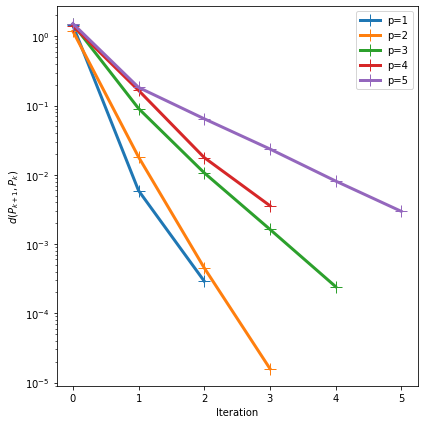

In [14]:
# load Synthetic dataset
TR, TR_L, TST, TST_L = datasets.load_synth(10, 100, 100)

# Obtain projection errors
x0 = np.random.randn(10, 1)
P0, r = np.linalg.qr(x0)
Popt, proj, WDA_Val, PROJ, Sub_Err1 = WDAnepv.wda_nepv(TR, TR_L, 1, 0.01, P0, tol=1e-8)

x0 = np.random.randn(10, 2)
P0, r = np.linalg.qr(x0)
Popt, proj, WDA_Val, PROJ, Sub_Err2 = WDAnepv.wda_nepv(TR, TR_L, 2, 0.01, P0, tol=1e-8)

x0 = np.random.randn(10, 3)
P0, r = np.linalg.qr(x0)
Popt, proj, WDA_Val, PROJ, Sub_Err3 = WDAnepv.wda_nepv(TR, TR_L, 3, 0.01, P0, tol=1e-8)

x0 = np.random.randn(10, 4)
P0, r = np.linalg.qr(x0)
Popt, proj, WDA_Val, PROJ, Sub_Err4 = WDAnepv.wda_nepv(TR, TR_L, 4, 0.01, P0, tol=1e-8)

x0 = np.random.randn(10, 5)
P0, r = np.linalg.qr(x0)
Popt, proj, WDA_Val, PROJ, Sub_Err5 = WDAnepv.wda_nepv(TR, TR_L, 5, 0.01, P0, tol=1e-8)

# Plot
pl.figure(1, figsize=(6, 6))
pl.semilogy(Sub_Err1, '+-', linewidth=3, markersize=12, label='p=1')
pl.semilogy(Sub_Err2, '+-', linewidth=3, markersize=12, label='p=2')
pl.semilogy(Sub_Err3, '+-', linewidth=3, markersize=12, label='p=3')
pl.semilogy(Sub_Err4, '+-', linewidth=3, markersize=12, label='p=4')
pl.semilogy(Sub_Err5, '+-', linewidth=3, markersize=12, label='p=5')
pl.legend()
pl.xlabel('Iteration')
pl.ylabel('$d(P_{k+1},P_k)$')

pl.tight_layout()

### Scenario 2


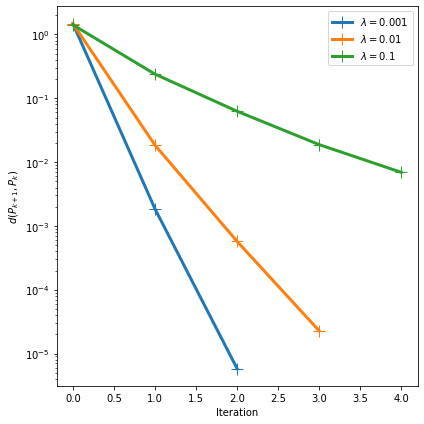

In [15]:
# load Synthetic dataset
TR, TR_L, TST, TST_L = datasets.load_synth(10, 100, 100)

# Obtain projection errors
x0 = np.random.randn(10, 2)
P0, r = np.linalg.qr(x0)
Popt, proj, WDA_Val, PROJ, Sub_Err1 = WDAnepv.wda_nepv(TR, TR_L, 2, 0.001, P0)
Popt, proj, WDA_Val, PROJ, Sub_Err2 = WDAnepv.wda_nepv(TR, TR_L, 2, 0.01, P0)
Popt, proj, WDA_Val, PROJ, Sub_Err3 = WDAnepv.wda_nepv(TR, TR_L, 2, 0.1, P0)

# Plot
pl.figure(1, figsize=(6, 6))
pl.semilogy(Sub_Err1, '+-', linewidth=3, markersize=12, label='$\lambda=0.001$')
pl.semilogy(Sub_Err2, '+-', linewidth=3, markersize=12, label='$\lambda=0.01$')
pl.semilogy(Sub_Err3, '+-', linewidth=3, markersize=12, label='$\lambda=0.1$')
pl.legend()
pl.xlabel('Iteration')
pl.ylabel('$d(P_{k+1},P_k)$')

pl.tight_layout()

# References

[1] R ́emi Flamary, Marco Cuturi, Nicolas Courty, and Alain Rakotomamonjy. Wasserstein dis-
criminant analysis. Machine Learning, 107(12):1923–1945, 2018.

[2] Lei-Hong Zhang, Li-Zhi Liao, and Michael K Ng. Fast algorithms for the generalized foley–
sammon discriminant analysis. SIAM journal on matrix analysis and applications, 31(4):1584–
1605, 2010.